# Douban Movie Word Cloud

In [1]:
import urllib.request
from bs4 import BeautifulSoup

#define output file
my_comments_file = '../output/comments_luozhixiang.txt'


def getHtml(url):
    """获取url页面"""
    headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/62.0.3202.94 Safari/537.36'}
    req = urllib.request.Request(url,headers=headers)
    req = urllib.request.urlopen(req)
    content = req.read().decode('utf-8')
    return content

def getComment(url):
    """解析HTML页面"""
    html = getHtml(url)
    soupComment = BeautifulSoup(html, 'html.parser')
    comments = soupComment.findAll('span', 'short')
    onePageComments = []
    for comment in comments:
        onePageComments.append(comment.getText()+'\n')
    return onePageComments

if __name__ == '__main__':
    f = open(my_comments_file, 'w', encoding='utf-8')
    for page in range(10):  # 豆瓣爬取多页评论需要验证。
        url = 'https://movie.douban.com/subject/2158647/comments?start=' + str(20*page) + '&limit=20&sort=new_score&status=P'
        print('第%s页的评论:' % (page+1))
        print(url + '\n')
        for i in getComment(url):
            f.write(i)
            print(i)
        print('\n')

第1页的评论:
https://movie.douban.com/subject/2158647/comments?start=0&limit=20&sort=new_score&status=P

为毛我转角总是遇到墙？

啊朋友们请 听呀听呀听呀 我唱歌来问候你 你有什么事情 情呀情呀我能够帮助你 在春天夏天 并呀并呀并呀秋天和严冬 我定呀定呀定呀 令呀令呀令呀 你心呀心呀心欢喜

印象比较深刻，男主比女主穷，颠覆了我的认知，哈哈哈

公主和“癞蛤蟆”的不知道是甜还是涩的爱情故事

罗志祥的所有偶像剧我都看不下去😂后来他就成了朱碧石

当年看的时候就觉得藤冈靛帅啊 是我才不选罗志祥…

富家女与穷小子的爱情剧，算是台剧的经典吧，《转角遇到爱》很喜欢这个片名。

这剧让我对蚵仔煎想了很久，去厦门旅行终于吃到还觉得一般般，现在想起又要流口水了。

...

喜欢上蚵仔煎。

我妈喜欢看……

吴忠宪说：“转角chua（踩）到sai（屎）”。

当时台湾偶像剧在内地都很火，大S，小猪颜值在线！

這齣劇唯一的印象就是~蚵仔煎.其餘一切都是浮雲,沒能記到腦海中.

那时的小猪还是帅的，记得歌儿，记得蚵仔煎。

蚵仔煎（读作“哦啊嗟”或“ORZ”，“orz”）

就觉得大S演流星花园时候好看。其他都不喜欢了。

偶像剧，其实我觉得大S不是很漂亮，不过给人感觉很舒服，罗志祥现在只能想起朱碧石，哈哈哈

好听的歌，美好的爱情故事，转角遇到爱

这部剧真的是那时候的最爱，剧情什么的都很喜欢，这个封面还做过一段时间的手机背景，喜欢这类故事，虽然不太现实



第2页的评论:
https://movie.douban.com/subject/2158647/comments?start=20&limit=20&sort=new_score&status=P

小时候看过，千金大小姐和穷小子的爱情故事，不过现在让我去看就不会的了，童话里的故事虽然美好，但不真实

就记得那双涂鸦鞋子了

藏着掖着，不能好好说话。

安徽卫视

转角遇到爱，那要是都是大直道儿，那估计单身的可能性就很大啦！

只记得以前很喜欢这部电视剧，美好的爱情就成了我的向往！

大S你不要装嫩了

短路没有逼我周激动没有逼我是我在逼我

有负分不？小豆瓣~~

歌好听

还是很经典的台剧吧，当年看的时候笑得很开心，老

In [2]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
#from scipy.misc import imread
from imageio import imread
import jieba

text = open(my_comments_file,"rb").read()
#结巴分词
wordlist = jieba.cut(text,cut_all=False)
wl = " ".join(wordlist)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\wach9011\AppData\Local\Temp\jieba.cache
Loading model cost 0.976 seconds.
Prefix dict has been built succesfully.


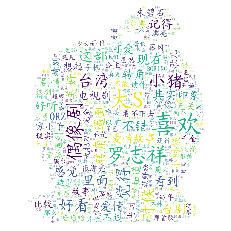

In [3]:
# define used files
my_mask_file = '../files/my_mask.png'
my_font_file = '../files/simkai.ttf'
my_output_pic = '../output/douban_comments_wordcloud_luozhixiang.png'

#设置停用词
my_stop_words = ["的", "这种", "这样", "真的", "还是", "这么", "可以", "就是", "这个", "没有" , "一个" , "什么", "剧", "一集","第一集", "第二集"]

#设置词云
wc = WordCloud(background_color = "white", #设置背景颜色
               mask = imread(my_mask_file),  #设置背景图片
               max_words = 2000, #设置最大显示的字数
               stopwords = my_stop_words,
               font_path = my_font_file,  # 设置为楷体 常规
               #设置中文字体，使得词云可以显示（词云默认字体是“DroidSansMono.ttf字体库”，不支持中文）
               max_font_size = 60,  #设置字体最大值
               random_state = 30, #设置有多少种随机生成状态，即有多少种配色方案
    )
myword = wc.generate(wl)#生成词云
wc.to_file(my_output_pic)

#展示词云图
plt.imshow(myword)
plt.axis("off")
plt.show()